# Crystal size analysis
### Summery
Crystallization of fuels such as biodiesel or parafine in diesel can be monitored by an optical microscopy with polarization to gain insight in the morphology of crystals. This script aims to determine the size distribution of the crystals, with the focus on the largest fraction, which can be used to evaluate the fuel performance or the effectives of the additive for low temperature properties.

## Introduction

The micrograms (photos) are taken by an optical microscope with polarization that filters the polarized light in the background while the light that passes through crystals is not blocked by the filter i.e. the crystals glow on a black (dark) background.
The high contrast allows us to process the image and extract the projected shape of the crystals. From the projected shape it is possible to get a high amount of information such as the area, maximal and minimal length, aspect ratio, orientation etc.

### Importing packages

In [1]:
import cv2
import numpy as np
import os
import pandas as pd
import seaborn as sn
from matplotlib import pyplot as plt

### Loading and displaying the image

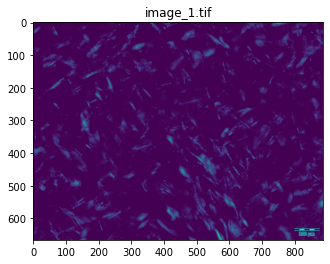

In [2]:
img_name = "image_1.tif"
img = cv2.imread('data/' + img_name, 0) # Loading the image in grayscale mode
plt.imshow(img)
plt.title(img_name)
plt.show()

Cropping the image to remove the scale (based on the previously displayed image and its coordinates)

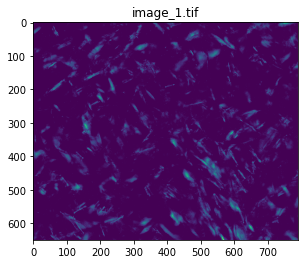

In [3]:
img_crop = img[0:650, 0:790] # The first range is the y-axis, the second range is the x-axis
plt.imshow(img_crop)
plt.title(img_name)
plt.show()

Determining the pixel to size (in micrometers) by trial and error (cropping the scale from the picture)

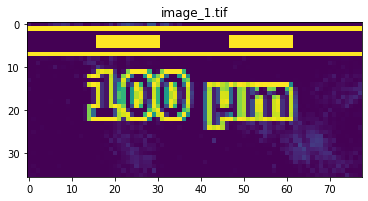

In [4]:
img_scale = img[630:, 800:878] # The first range is the y-axis, the second range is the x-axis
plt.imshow(img_scale)
plt.title(img_name)
plt.show()

In [5]:
pixel_to_um = 78/100

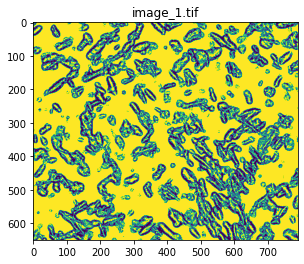

In [10]:
th = cv2.adaptiveThreshold(img_crop,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,21,2)
plt.imshow(th)
plt.title(img_name)
plt.show()

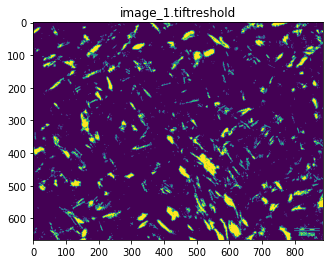

In [13]:
ret,th1 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+ cv2.THRESH_OTSU)
plt.imshow(th1)
plt.title(img_name + 'treshold')
plt.show()